# Classification spectrale de données générées

In [1]:
import numpy as np
from numpy import newaxis

data1 = np.hstack((np.random.randn(100, 3) + [3, 3, 3],    (np.ones(100))[:,newaxis]))
data2 = np.hstack((np.random.randn(100, 3) + [-3, -3, -3], (2 * np.ones(100))[:,newaxis]))
data3 = np.hstack((np.random.randn(100, 3) + [-3, 3, 3],   (3 * np.ones(100))[:,newaxis]))
data4 = np.hstack((np.random.randn(100, 3) + [-3, -3, 3],  (4 * np.ones(100))[:,newaxis]))
data5 = np.hstack((np.random.randn(100, 3) + [3, 3, -3],   (5 * np.ones(100))[:,newaxis]))

data = np.concatenate((data1, data2, data3, data4, data5))
print(data.shape)
np.random.shuffle(data)

(500, 4)


Appliquez la classification spectrale avec une construction du graphe sur la base des k plus proches voisins 

/home/yvan/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


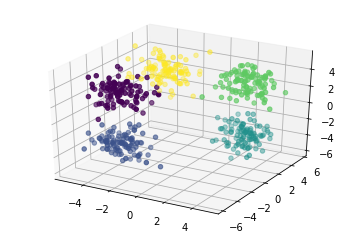

In [2]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters = 5, eigen_solver='arpack', 
                              affinity='nearest_neighbors', n_neighbors = 10).fit(data[:,:3])

# Visualisons les résultats de cette classification

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=spectral.labels_)
plt.show()

L’indice de Rand ajusté permet d’évaluer la cohérence entre les groupes de départ et le partitionnement trouvé par classification automatique

In [3]:
from sklearn import metrics
metrics.adjusted_rand_score(spectral.labels_, data[:,3])

1.0

Répétez plusieurs fois la classification avec des valeurs différentes (mais ≥1≥1) pour le paramètre n_neighbors (dont la valeur par défaut est 10). 

In [4]:
for i in range(2, 11):
    spectral = SpectralClustering(n_clusters = 5, eigen_solver='arpack', 
                              affinity='nearest_neighbors', n_neighbors = i).fit(data[:,:3])
    print("{} = {}".format(i, metrics.adjusted_rand_score(spectral.labels_, data[:,3])))

/home/yvan/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


2 = 0.006643738083154385
3 = 0.0007338040205007146
4 = 0.7285841701892051
5 = 0.7804807148757328
6 = 0.7034732315986912
7 = 0.7336273986458012
8 = 0.7823431911367007
9 = 1.0
10 = 1.0


## Question
Que constatez-vous ? Expliquez.

    On constate que l'indice augmente de 2 à 5, puis stagne après
    Les k plus proches voisins sont ceux du noeud. On obtient une cohérence 
    forte à partir de 5 
    
Changez le mode de calcul de la matrice de similarités avec affinity = 'rbf'
faites varier le paramètre correspondant gamma
visualisez les résultats.

    gamma = 1/sigma^2 => gamma grand => sigma petit => loi normale pointu => centre regroupé 

In [5]:
for i in range(0, 3):
    spectral = SpectralClustering(n_clusters = 5, eigen_solver='arpack', 
                                  affinity='rbf', gamma = 10 ** (-i)).fit(data[:,:3])
    print("{} = {}".format(10 ** (-i), metrics.adjusted_rand_score(spectral.labels_, data[:,3])))

1 = 0.5172124522942327
0.1 = 1.0
0.01 = 1.0


## Question : (→→ Compte-rendu) 
Sur les 500 données générées comme au TP précédent (sur K-means) 
suivant une distribution uniforme dans [0,1)^3, 
appliquez la classification spectrale avec toujours n_clusters=5 
et visualisez les résultats. 
Examinez la stabilité (en utilisant l’indice de Rand) des partitionnements obtenus. 
Observez-vous des différences significatives par rapport aux résultats obtenus lors du TP 
sur K-means ? Expliquez.

    MEAN =  0.995280561749
    STD =  0.00856658735177
    On trouve quasiment toujours la même répartition
    la variation vient de K-Means à la fin 
    Cependant, la préparation est très efficace
    

Compte-rendu
(500, 3)
MEAN = 0.9703396800555109
STD = 0.03874301431652687


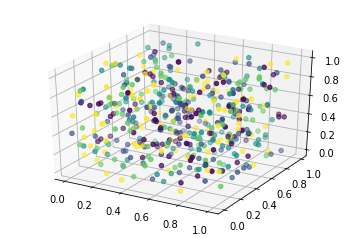

In [9]:
print("Compte-rendu")
def stability(z):
    max_k = len(z)
    r = [] 
    for i in range(0, max_k):
        for j in range(i + 1, max_k - 1):
            r.append(metrics.adjusted_rand_score(z[i].labels_, z[j].labels_))
    return np.asarray(r)

d = np.random.uniform(0, 1, (500, 3))
print(d.shape)

max_k = 30
z = []
for k in range(0, max_k):
    z.append(SpectralClustering(n_clusters = 5, eigen_solver='arpack', 
		         affinity='nearest_neighbors').fit(d))

r = stability(z)

from scipy import stats
print("MEAN = {}".format(r.mean()))
print("STD = {}".format(r.std()))
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d[:,0], d[:,1], d[:,2], c=spectral.labels_)
plt.show()

# Classification spectrale des données « textures »
Mélangez les observations et appliquez la classification spectrale à ces données

In [18]:
texture = np.loadtxt('texture.dat')
np.random.shuffle(texture)
spectral = SpectralClustering(n_clusters=11, eigen_solver='arpack',
               affinity='nearest_neighbors').fit(texture[:,:40])
print(metrics.adjusted_rand_score(spectral.labels_, texture[:,40]))

/home/yvan/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


0.581451089715


/home/yvan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


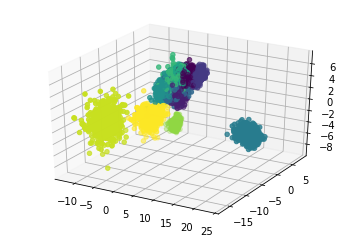

/home/yvan/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


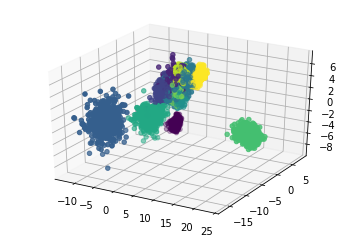

0.87982991298013347

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

tlda = lda.fit_transform(texture, texture[:,40])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tlda[:, 0], tlda[:, 1], tlda[:, 2], c = texture[:,40])
plt.show()

spectral = SpectralClustering(n_clusters=11, eigen_solver='arpack',
               affinity='nearest_neighbors').fit(tlda)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(tlda[:, 0], tlda[:, 1], tlda[:, 2], c = spectral.labels_)
plt.show()

metrics.adjusted_rand_score(spectral.labels_, texture[:,40])